In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('words_glasgow.csv') #, index_col=0
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0


# 1. z_score for outliers

In [8]:
#df_drop = df.drop(['length','polysemy', 'web_corpus_freq'], axis = 1)
#df_drop
#df_z_score = df

In [9]:
df_z_score[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender']] = (df[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender']]
                - df[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender']].mean()
             ) / df[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender']].std()
df_z_score.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,-0.435787,-1.394176,-0.764976,0.619888,-0.243574,-3.136430,2.088630,0.503860,1.415189,0,160074.0
1,abbey,5,-1.415586,0.435416,-0.406094,0.934461,0.455563,-2.113870,0.825030,0.962185,-0.873550,0,4224864.0
2,abbreviate,10,-1.280693,0.102364,0.204219,-0.892992,-1.134184,-0.163191,1.117183,-1.435956,-0.141329,0,140105.0
3,abdicate,8,-0.441256,-0.827799,-0.672569,-0.836494,-1.619104,-1.411539,1.667962,0.530246,1.169654,0,124123.0
4,abdication,10,-0.758437,-0.756924,-0.263186,-0.888807,-1.578755,-2.360283,1.806854,0.925050,0.516355,0,128143.0


In [10]:
#df_z_score = df_z_score.drop(['length','polysemy', 'web_corpus_freq'], axis = 1)
#df_z_score

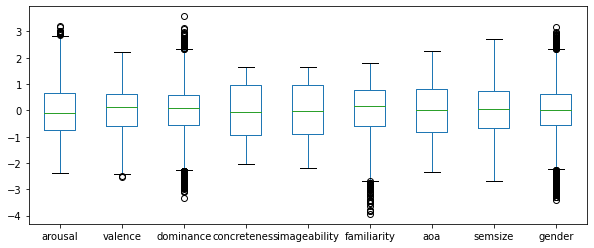

In [11]:
df_z_score[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender']].plot.box(figsize = (10, 4))
plt.show()

In [12]:
columns = df_z_score[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender']].columns
columns

Index(['arousal', 'valence', 'dominance', 'concreteness', 'imageability',
       'familiarity', 'aoa', 'semsize', 'gender'],
      dtype='object')

In [13]:
Limit_list = []
for i in columns:
    limit = (df_z_score[i].mean()+df_z_score[i].quantile(0.75))+(1.5*(df_z_score[i].quantile(0.75)-df_z_score[i].quantile(0.25)))
    Limit_list.append(limit)
Limit_list

[2.8217042150665734,
 2.484220383800791,
 2.322587032469006,
 3.835020489702802,
 3.72538195713594,
 2.8138469277703546,
 3.2452669648707086,
 2.845321271256807,
 2.335946466064911]

In [14]:
outliers = df[
      (df_z_score[columns[0]] < -Limit_list[0]) | (df_z_score[columns[0]] > Limit_list[0])
    | (df_z_score[columns[1]] < -Limit_list[1]) | (df_z_score[columns[1]] > Limit_list[1])
    | (df_z_score[columns[2]] < -Limit_list[2]) | (df_z_score[columns[2]] > Limit_list[2])
    | (df_z_score[columns[3]] < -Limit_list[3]) | (df_z_score[columns[3]] > Limit_list[3])
    | (df_z_score[columns[4]] < -Limit_list[4]) | (df_z_score[columns[4]] > Limit_list[4])
    | (df_z_score[columns[5]] < -Limit_list[5]) | (df_z_score[columns[5]] > Limit_list[5])
    | (df_z_score[columns[6]] < -Limit_list[6]) | (df_z_score[columns[6]] > Limit_list[6])
    | (df_z_score[columns[7]] < -Limit_list[7]) | (df_z_score[columns[7]] > Limit_list[7])
    | (df_z_score[columns[8]] < -Limit_list[8]) | (df_z_score[columns[8]] > Limit_list[8])
    ]
outliers

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
8,abducted,8,5.344,1.969,2.871,4.813,4.212,5.406,5.290,5.161,4.546,0,837949.0
10,aberration,10,4.852,3.269,4.852,3.208,2.840,2.485,6.414,4.720,4.320,0,443062.0
24,abuse,5,4.879,1.563,2.500,3.419,3.909,5.303,5.177,4.743,5.061,0,36269685.0
41,aches,5,4.063,2.871,2.813,3.813,3.219,5.655,4.000,3.968,3.867,0,1116644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,woman,5,5.719,6.939,6.333,6.515,6.606,6.697,2.000,4.606,1.314,0,70613606.0
4625,womb,4,4.265,6.235,4.441,6.235,5.394,5.294,5.273,3.424,1.235,0,1173095.0
4626,women,5,5.200,6.971,6.235,6.412,6.371,6.515,2.457,4.515,1.114,0,242520455.0
4654,wrestler,8,4.625,5.029,4.750,6.125,6.235,4.824,3.765,4.636,6.394,0,828254.0


In [15]:
outliers[outliers['polysemy'] == 1]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
537,bridal,6,5.364,6.807,5.250,4.394,5.455,4.966,4.121,4.375,1.258,1,8466303.0
824,cock,4,6.585,5.046,5.984,6.288,6.302,5.787,5.227,3.866,6.391,1,37573028.0
988,cowboy,6,4.853,5.471,5.735,6.177,6.667,5.000,2.677,3.647,6.324,1,6868615.0
1312,dress,5,5.629,6.371,5.879,6.611,6.727,6.710,2.028,3.265,1.472,1,27318959.0
1579,father,6,4.667,6.657,4.636,6.000,6.412,5.969,1.912,4.857,6.788,1,48580528.0
1920,groom,5,4.719,6.294,5.273,5.647,5.886,4.971,4.091,4.059,6.571,1,2637912.0
3330,queen,5,4.906,5.576,4.656,5.552,6.065,5.633,2.667,4.781,1.313,1,32366847.0
3778,skirt,5,5.061,5.909,5.515,6.879,6.688,6.484,2.303,2.969,1.618,1,9981485.0


In [16]:
outliers.isnull().sum()

word               0
length             0
arousal            0
valence            0
dominance          0
concreteness       0
imageability       0
familiarity        0
aoa                0
semsize            0
gender             0
polysemy           0
web_corpus_freq    5
dtype: int64

In [17]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0


In [18]:
outliers

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
8,abducted,8,5.344,1.969,2.871,4.813,4.212,5.406,5.290,5.161,4.546,0,837949.0
10,aberration,10,4.852,3.269,4.852,3.208,2.840,2.485,6.414,4.720,4.320,0,443062.0
24,abuse,5,4.879,1.563,2.500,3.419,3.909,5.303,5.177,4.743,5.061,0,36269685.0
41,aches,5,4.063,2.871,2.813,3.813,3.219,5.655,4.000,3.968,3.867,0,1116644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,woman,5,5.719,6.939,6.333,6.515,6.606,6.697,2.000,4.606,1.314,0,70613606.0
4625,womb,4,4.265,6.235,4.441,6.235,5.394,5.294,5.273,3.424,1.235,0,1173095.0
4626,women,5,5.200,6.971,6.235,6.412,6.371,6.515,2.457,4.515,1.114,0,242520455.0
4654,wrestler,8,4.625,5.029,4.750,6.125,6.235,4.824,3.765,4.636,6.394,0,828254.0


In [19]:
df_no_outliers_words = set(df.word) - set(outliers.word)
list_words = list(df_no_outliers_words)
#list_words

In [20]:
#df_no_outliers = df[df['word'] in list_words]
df_no_outliers = df[df['word'].isin(list_words)]
df_no_outliers

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,1490684.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0


In [21]:
#df_no_outliers.to_csv("df_no_outliers.csv")
df_no_outliers = pd.read_csv('df_no_outliers.csv', index_col=0) #, index_col=0
df_no_outliers.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,1490684.0


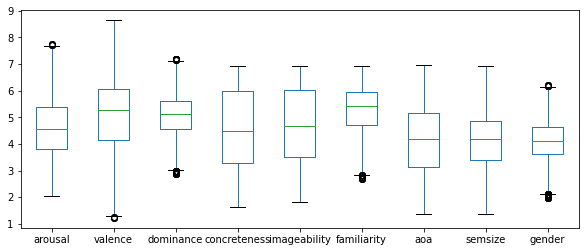

In [22]:
df_no_outliers[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender']].plot.box(figsize = (10, 4))
plt.show()

# 2. Log transform of WCF

In [157]:
df_no_outliers['web_corpus_freq'] = np.log2(df_no_outliers['web_corpus_freq'])
#df_no_outliers['wcf1'] = np.log(df_no_outliers['web_corpus_freq'])
#df_no_outliers['wcf'] = np.log10(df_no_outliers['web_corpus_freq'])
df_no_outliers

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,21.606455
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,24.873398
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,19.321157
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,23.466325


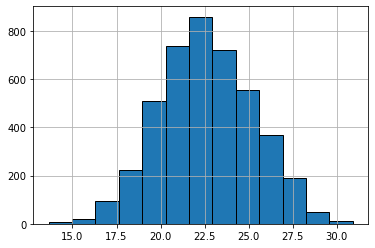

In [158]:
#the best 
df_no_outliers['web_corpus_freq'].hist(bins = 13, edgecolor = 'k')
plt.show()

In [125]:
#df_no_outliers['wcf1'].hist(bins = 13, edgecolor = 'k')
#plt.show()
#df_no_outliers['wcf'].hist(bins = 13, edgecolor = 'k')
#plt.show()

In [159]:
df_no_outliers.isnull().sum()

word               0
length             0
arousal            0
valence            0
dominance          0
concreteness       0
imageability       0
familiarity        0
aoa                0
semsize            0
gender             0
polysemy           0
web_corpus_freq    9
dtype: int64

In [161]:
#df_log = df_no_outliers
#df_log

In [163]:
#df_log.to_csv("df_log.csv")
df_log = pd.read_csv('df_log.csv', index_col=0) #, index_col=0
df_log.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


# 3. Fill remaining missing values of WCF

In [164]:
mean_web_corpus_freq = df_log['web_corpus_freq'].mean()
df_filled = df_log.fillna(mean_web_corpus_freq)
df_filled.isna().sum()

word               0
length             0
arousal            0
valence            0
dominance          0
concreteness       0
imageability       0
familiarity        0
aoa                0
semsize            0
gender             0
polysemy           0
web_corpus_freq    0
dtype: int64

In [166]:
#df_filled.to_csv("df_filled.csv")
df_filled = pd.read_csv('df_filled.csv', index_col=0) #, index_col=0
df_filled.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


# 4. Square Root Transform of AROUSAL

In [167]:
df_filled['arousal'] = df_filled['arousal'].pow(1./2)
df_new = df_filled
df_new

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,1.767767,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,1.809143,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,2.047926,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,1.961122,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,2.171175,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,2.486966,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,21.606455
4678,zero,4,2.007735,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,24.873398
4679,zest,4,2.443154,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,19.321157
4680,zoo,3,2.430843,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,23.466325


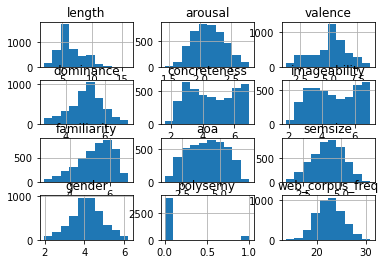

In [169]:
#final
df_new.hist()
plt.show()

In [172]:
#df_new.to_csv("df_new.csv")

In [23]:
df_new = pd.read_csv('df_new.csv', index_col=0)
df_new.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,1.767767,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,1.809143,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,2.047926,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,1.961122,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,2.171175,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


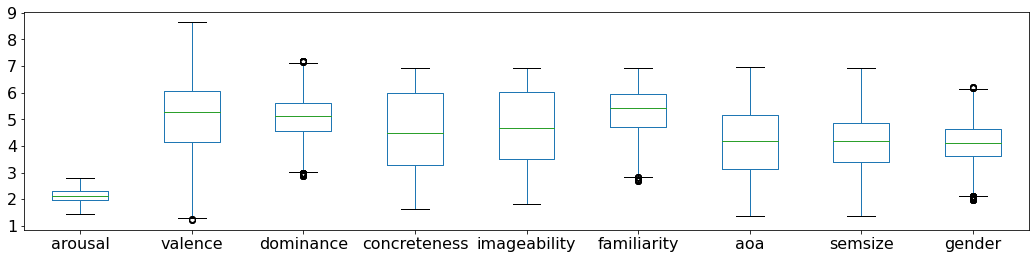

In [32]:
df_new[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 
        'familiarity', 'aoa', 'semsize', 'gender']].plot.box(figsize = (18, 4))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()